# Import libs

In [1]:
# sklearn / numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
import numpy as np

# implemented structure
from src.handleData import handleData
from src.handleClassifier import handleClassifier
from src.handleResult import handleResult

# Load data

In [2]:
hD = handleData("./data/data.csv")  # construct handleData object
df = hD.loadData("id")  # load the data
labels = hD.encodeLabels(df, "species")  # get labels
dfTrain, dfTest = hD.splitData(df, 0.7, "species")  # get the training and testing sets

# Descriptive analysis

In [ ]:
# TODO : COCO

# Training phase
## Setting the classifiers and their configuration

In [ ]:
# The selected classifiers and their config
classifierList = [
    {
        "name": "LinearDiscriminantAnalysis",
        "preprocess": False,
        "fitStrategy": {
            "option": "CV",
            "config": {"n_jobs": -1, "scoring": "accuracy"},
        },
    },
    {
        "name": "QuadraticDiscriminantAnalysis",
        "preprocess": False,
        "fitStrategy": {
            "option": "CV",
            "config": {"n_jobs": -1, "scoring": "accuracy"},
        },
    },
    {
        "name": "LogisticRegression",
        "preprocess": True,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__C": [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "SGDClassifier",
        "preprocess": True,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "DecisionTreeClassifier",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__min_samples_leaf": list(range(1, 6)),
                    "clf__min_samples_split": list(range(2, 12, 2)),
                    "clf__max_depth": list(range(1, 11)),
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "RandomForestClassifier",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__min_samples_leaf": list(range(1, 6)),
                    "clf__min_samples_split": list(range(2, 12, 2)),
                    "clf__n_estimators": [50, 75, 100],
                    "clf__max_depth": list(range(1, 6)),
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "AdaBoostClassifier",
        "preprocess": False,
        "config": {"base_estimator": DecisionTreeClassifier()},
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__base_estimator__max_depth": [1, 5, 10],
                    "clf__n_estimators": [50, 75, 100],
                    "clf__learning_rate": [0.01, 0.1, 1.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "BaggingClassifier",
        "preprocess": False,
        "config": {"base_estimator": DecisionTreeClassifier()},
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__base_estimator__max_depth": [1, 5, 10],
                    "clf__n_estimators": [50, 75, 100],
                    "clf__max_samples": [0.25, 0.5, 0.75, 1.0],
                    "clf__max_features": [0.25, 0.5, 0.75, 1.0],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "SVC",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": [
                    {"clf__C": [1, 10, 100, 1000], "clf__kernel": ["linear"]},
                    {
                        "clf__C": [1, 10, 100, 1000],
                        "clf__kernel": ["poly"],
                        "clf__degree": list(range(2, 9)),
                        "clf__coef0": list(np.linspace(0.000001, 2, num=10)),
                    },
                    {
                        "clf__C": [1, 10, 100, 1000],
                        "clf__kernel": ["rbf"],
                        "clf__gamma": ["scale", "auto"],
                        "clf__gamma": list(np.linspace(0.000001, 2, num=10)),
                    },
                    {
                        "clf__C": [1, 10, 100, 1000],
                        "clf__kernel": ["sigmoid"],
                        "clf__coef0": list(np.linspace(0.000001, 2, num=10)),
                    },
                ],
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "LinearSVC",
        "preprocess": False,
        "config": {"dual": False},
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {
                    "clf__C": np.logspace(-3, 3, 7),
                    "clf__multi_class": ["crammer_singer", "ovr"],
                    "clf__penalty": ["l1", "l2"],
                },
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
    {
        "name": "KNeighborsClassifier",
        "preprocess": False,
        "fitStrategy": {
            "option": "GridSearch",
            "config": {
                "param_grid": {"clf__n_neighbors": np.arange(2, 15)},
                "n_jobs": -1,
                "scoring": "accuracy",
            },
        },
    },
]

## No feature trimming

In [3]:
hC = handleClassifier()  # construct handleClassifier object
clf = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.8989677822959024
BaggingClassifier, GridSearchCV best score = 0.8643728495464498
DecisionTreeClassifier, GridSearchCV best score = 0.17617558127411115
KNeighborsClassifier, GridSearchCV best score = 0.8369617349598583
LinearDiscriminantAnalysis, CV score = 0.9596496715670941
LinearSVC, GridSearchCV best score = 0.9408716505056823
LogisticRegression, GridSearchCV best score = 0.9812636847044104
QuadraticDiscriminantAnalysis, CV score = 0.028839537065999378
RandomForestClassifier, GridSearchCV best score = 0.7230320091752687
SGDClassifier, GridSearchCV best score = 0.9567719737253675
SVC, GridSearchCV best score = 0.939432801584819


## Feature reduction (PCA)

In [4]:
# change the config for a feature reduction
for classifierDict in classifierList:
    classifierDict["preprocess"] = True
    classifierDict["feature"] = {"option": "reduction"}
    classifierDict["fitStrategy"]["option"] = "GridSearch"

    if not "param_grid" in classifierDict["fitStrategy"]["config"]:
        classifierDict["fitStrategy"]["config"]["param_grid"] = dict()

    if isinstance(classifierDict["fitStrategy"]["config"]["param_grid"], list):
        for L in classifierDict["fitStrategy"]["config"]["param_grid"]:
            L["ftr__n_components"] = [
                0.5,
                0.75,
                0.85,
            ]

    else:
        classifierDict["fitStrategy"]["config"]["param_grid"]["ftr__n_components"] = [
            0.5,
            0.75,
            0.85,
        ]

clfReduction = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.9133875508289021
BaggingClassifier, GridSearchCV best score = 0.9249713272859973
DecisionTreeClassifier, GridSearchCV best score = 0.4530497341257429
KNeighborsClassifier, GridSearchCV best score = 0.9509748722760923
LinearDiscriminantAnalysis, GridSearchCV best score = 0.9725993118548638
LinearSVC, GridSearchCV best score = 0.9726201647377751
LogisticRegression, GridSearchCV best score = 0.9755082890209572
QuadraticDiscriminantAnalysis, GridSearchCV best score = 0.2308518402669169
RandomForestClassifier, GridSearchCV best score = 0.7503075800229382
SGDClassifier, GridSearchCV best score = 0.9351371077051402
SVC, GridSearchCV best score = 0.9740798665415493


## Feature selection (Lasso)

In [5]:
# change the config for a feature selection
for classifierDict in classifierList:
    classifierDict["feature"]["option"] = "selection"
    classifierDict["feature"]["config"] = {"estimator": Lasso()}

    if isinstance(classifierDict["fitStrategy"]["config"]["param_grid"], list):
        for L in classifierDict["fitStrategy"]["config"]["param_grid"]:
            del L["ftr__n_components"]
            L["ftr__estimator__alpha"] = [
                1.0,
                2.5,
                5.0,
            ]

    else:
        del classifierDict["fitStrategy"]["config"]["param_grid"]["ftr__n_components"]
        classifierDict["fitStrategy"]["config"]["param_grid"][
            "ftr__estimator__alpha"
        ] = [
            1.0,
            2.5,
            5.0,
        ]

clfSelection = hC.fitClassifiers(dfTrain, classifierList)  # fit

AdaBoostClassifier, GridSearchCV best score = 0.8990094880617245
BaggingClassifier, GridSearchCV best score = 0.8976123449066833
DecisionTreeClassifier, GridSearchCV best score = 0.2613283286414347
KNeighborsClassifier, GridSearchCV best score = 0.861547283912001
LinearDiscriminantAnalysis, GridSearchCV best score = 0.9379835262225003
LinearSVC, GridSearchCV best score = 0.9307788551767281
LogisticRegression, GridSearchCV best score = 0.9394536544677301
QuadraticDiscriminantAnalysis, GridSearchCV best score = 0.028818684183088316
RandomForestClassifier, GridSearchCV best score = 0.7475549994786779
SGDClassifier, GridSearchCV best score = 0.9062454384318632
SVC, GridSearchCV best score = 0.9495360233552288


# Prediction results
## No feature trimming

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.905724,0.921332,0.905724,0.901780,0.998626
BaggingClassifier,0.929293,0.931313,0.929293,0.922078,0.999141
DecisionTreeClassifier,0.181818,0.180657,0.181818,0.167721,0.763004
KNeighborsClassifier,0.831650,0.853535,0.831650,0.818543,0.963736
LinearDiscriminantAnalysis,0.962963,0.973401,0.962963,0.960702,0.999920
LinearSVC,0.939394,0.955724,0.939394,0.936460,NaN
LogisticRegression,0.983165,0.988384,0.983165,0.982035,1.000000
QuadraticDiscriminantAnalysis,0.037037,0.050758,0.037037,0.037463,0.513605
RandomForestClassifier,0.801347,0.802886,0.801347,0.774339,0.996541
SGDClassifier,0.956229,0.970202,0.956229,0.955051,NaN


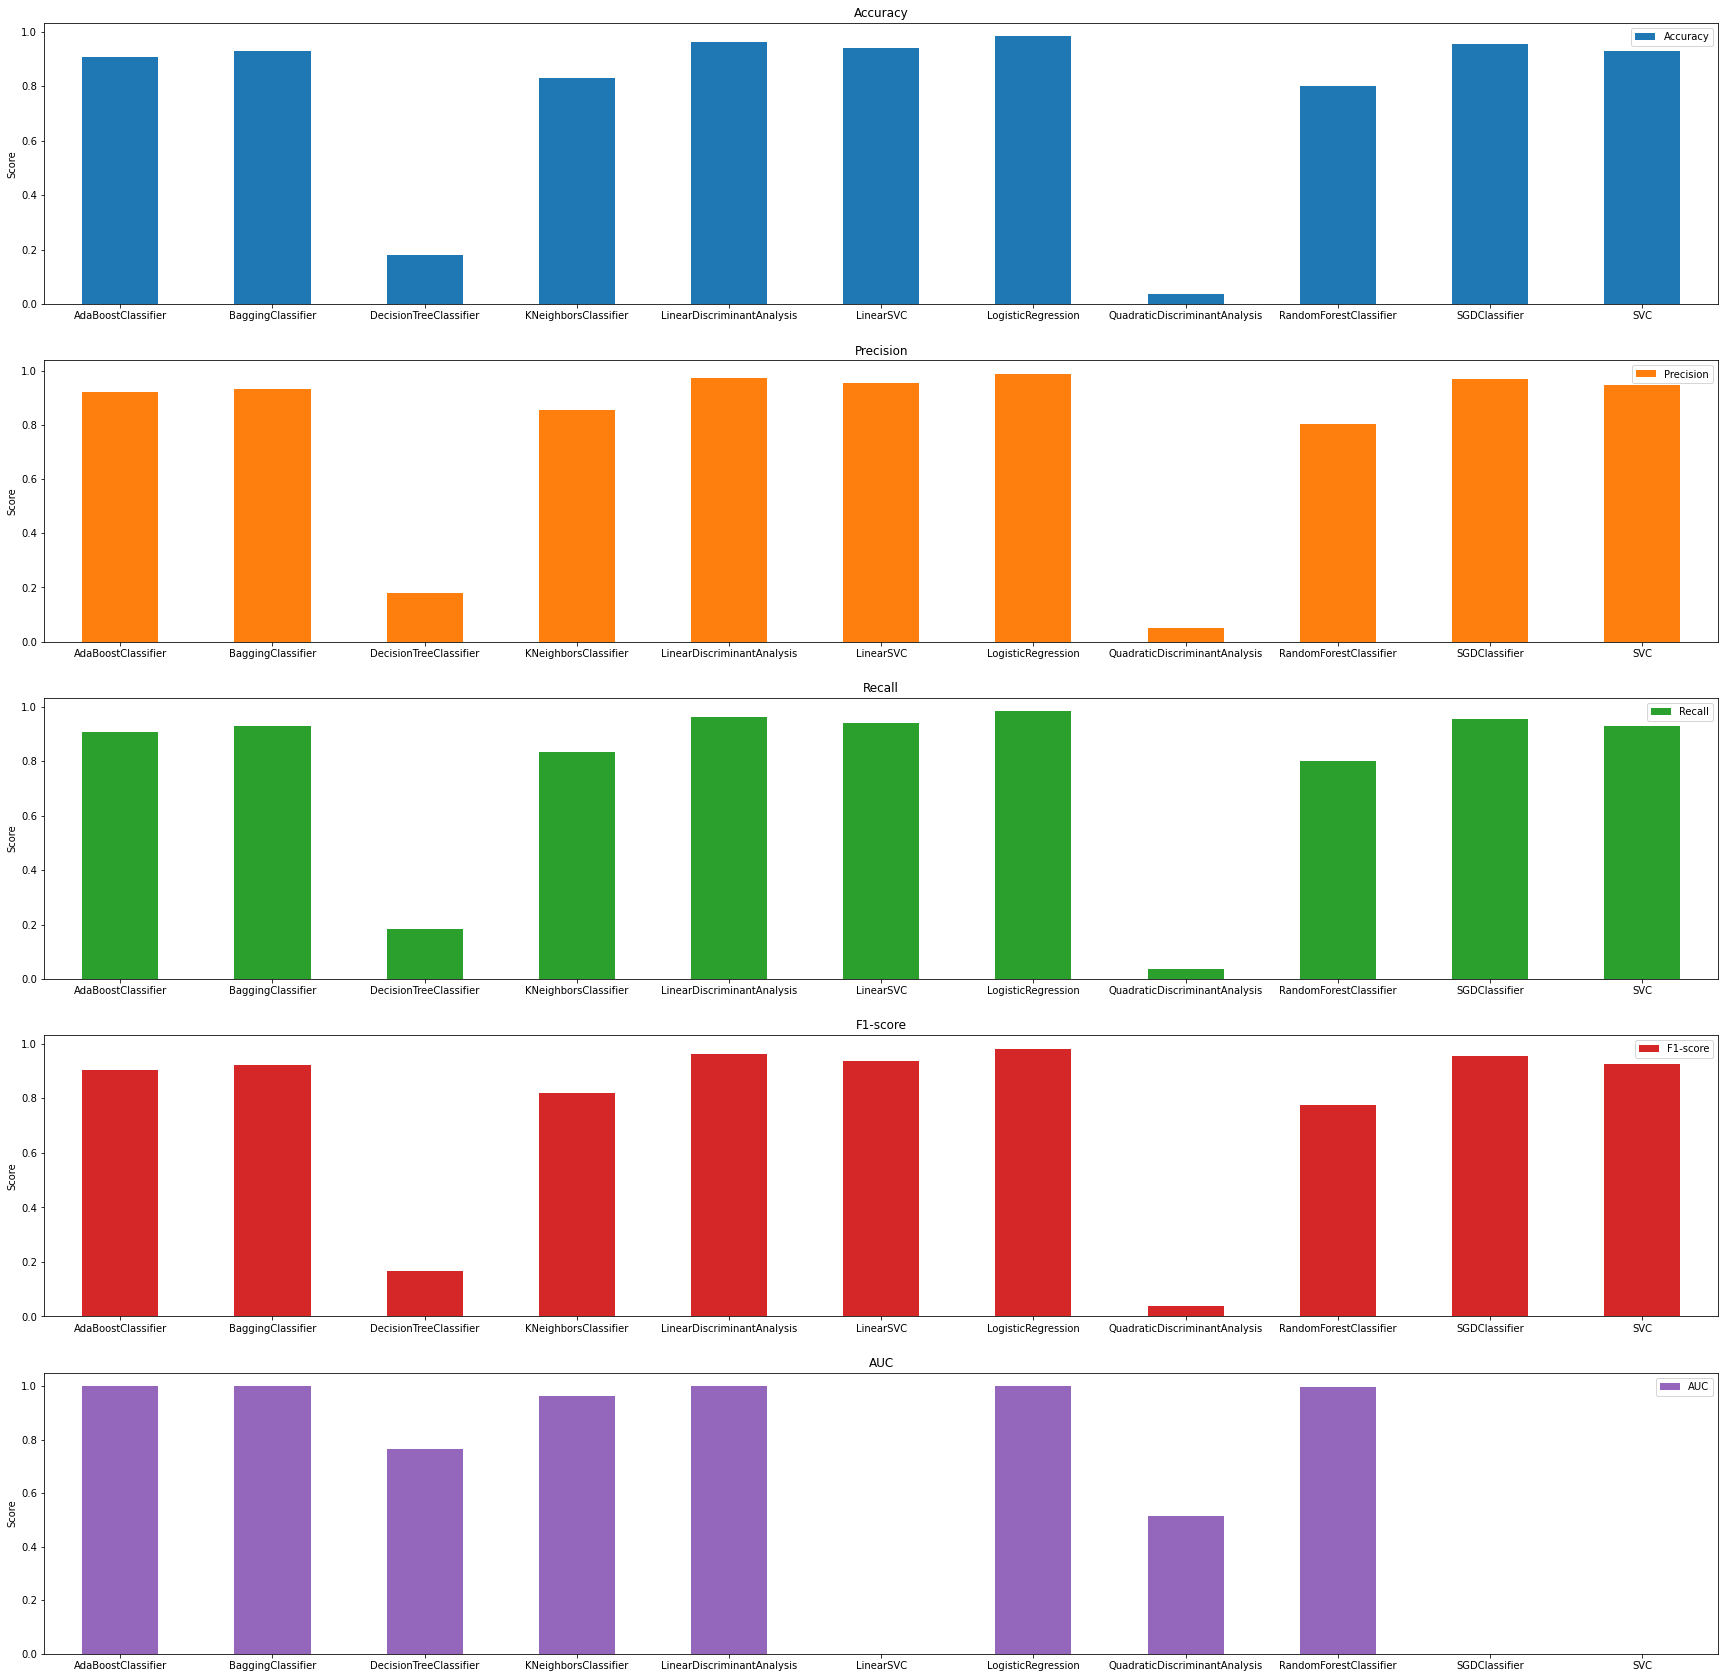

In [10]:
hR = handleResult()
hR.predictionResult(dfTest, clf)
hR.plotBarChart()

## Feature reduction (PCA)

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.949495,0.962626,0.949495,0.946537,0.999599
BaggingClassifier,0.936027,0.952694,0.936027,0.933141,0.999244
DecisionTreeClassifier,0.515152,0.559129,0.515152,0.491994,0.875616
KNeighborsClassifier,0.959596,0.971886,0.959596,0.957600,0.991525
LinearDiscriminantAnalysis,0.966330,0.978283,0.966330,0.963660,1.000000
LinearSVC,0.979798,0.985859,0.979798,0.978571,NaN
LogisticRegression,0.979798,0.985859,0.979798,0.978571,1.000000
QuadraticDiscriminantAnalysis,0.616162,0.654679,0.616162,0.595155,0.980342
RandomForestClassifier,0.821549,0.841534,0.821549,0.801732,0.996553
SGDClassifier,0.939394,0.952814,0.939394,0.934776,NaN


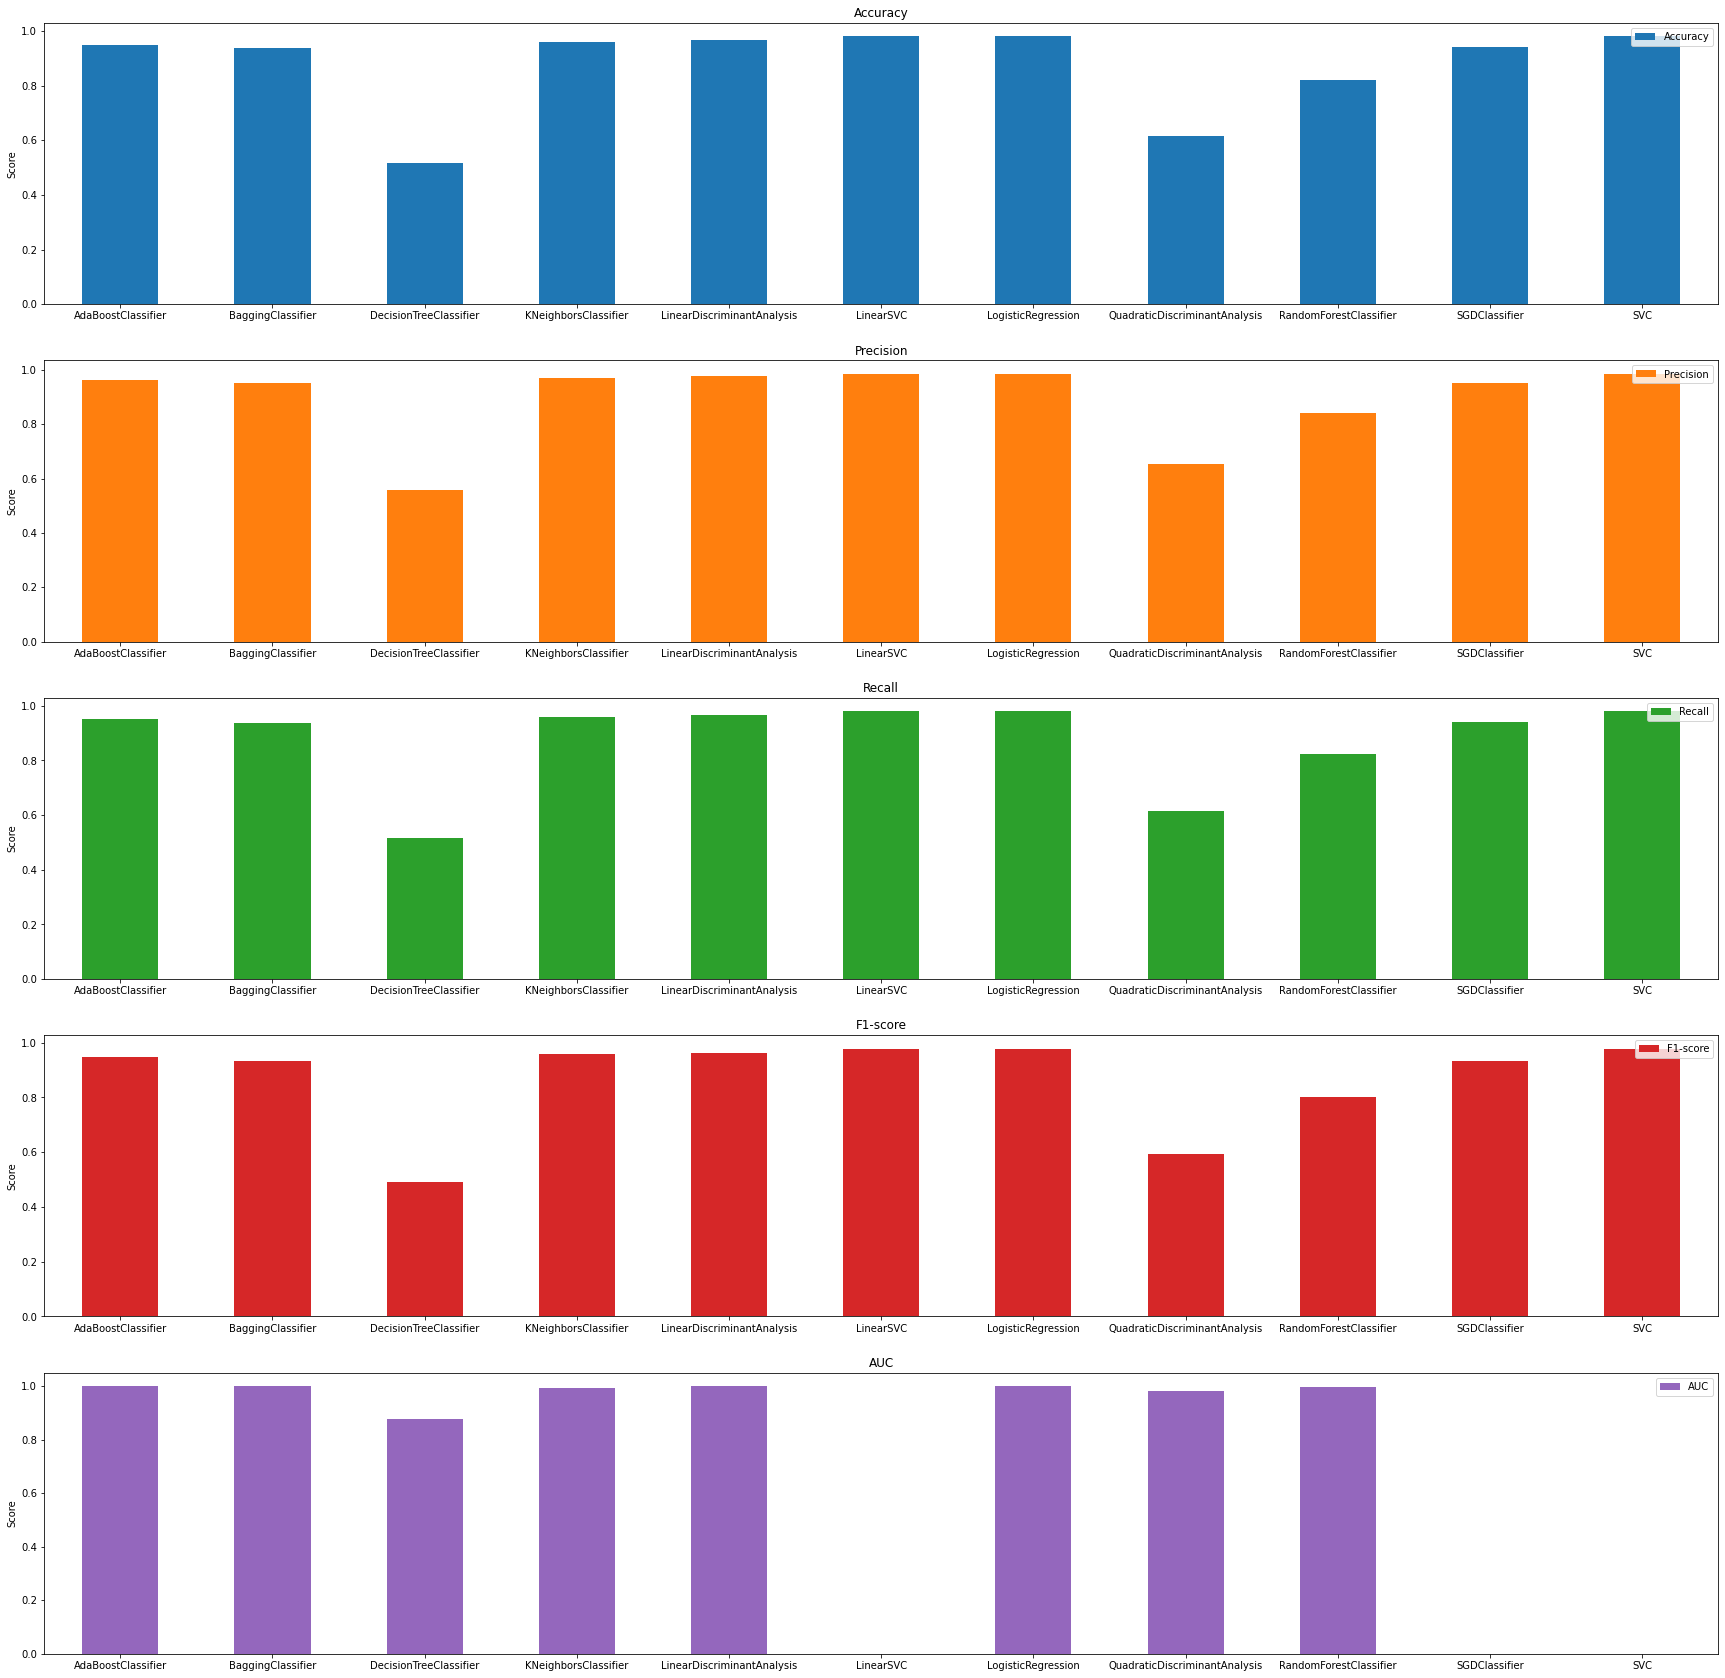

In [11]:
hR.predictionResult(dfTest, clfReduction)
hR.plotBarChart()

## Feature selection (Lasso)

,Accuracy,Precision,Recall,F1-score,AUC
AdaBoostClassifier,0.898990,0.906013,0.898990,0.890933,0.997400
BaggingClassifier,0.925926,0.950253,0.925926,0.922393,0.998901
DecisionTreeClassifier,0.292929,0.282518,0.292929,0.256653,0.783636
KNeighborsClassifier,0.838384,0.866835,0.838384,0.828908,0.954019
LinearDiscriminantAnalysis,0.915825,0.940693,0.915825,0.911640,0.997721
LinearSVC,0.919192,0.939851,0.919192,0.917268,NaN
LogisticRegression,0.932660,0.948822,0.932660,0.929654,0.998969
QuadraticDiscriminantAnalysis,0.043771,0.051808,0.043771,0.041872,0.517007
RandomForestClassifier,0.811448,0.825036,0.811448,0.788480,0.997538
SGDClassifier,0.858586,0.888865,0.858586,0.851299,NaN


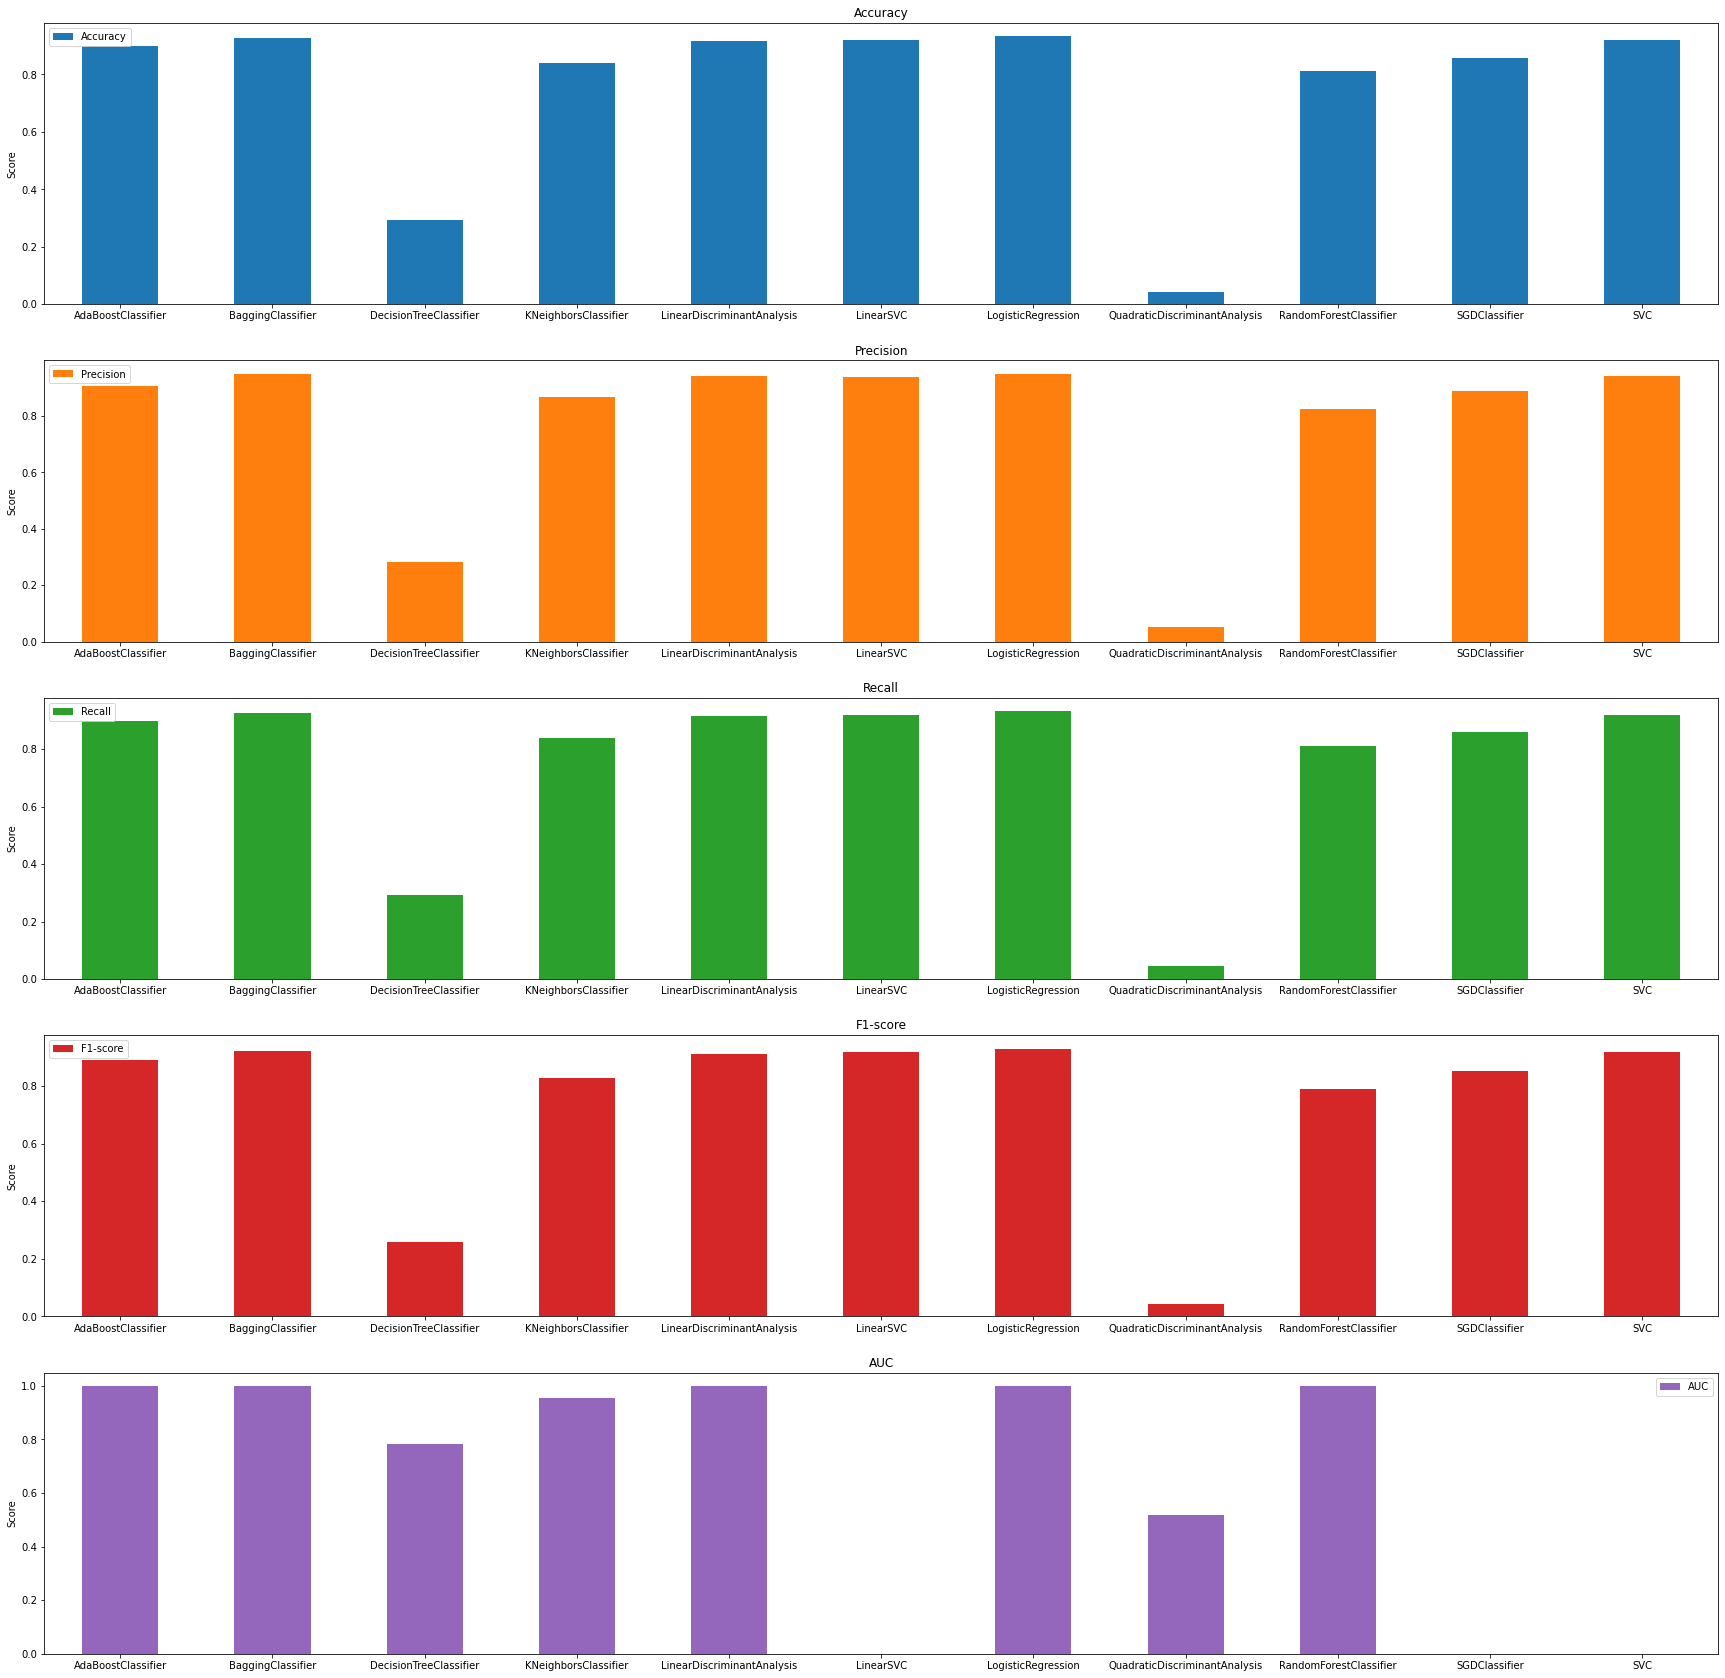

In [12]:
hR.predictionResult(dfTest, clfSelection)
hR.plotBarChart()